# Word Detection Models

# 1. PDF Pre-processing

# 1.1. Working on converting pdfs to images

In [1]:
import cv2
import pdf2image
from matplotlib import pyplot as plt

In [18]:
import os

pdfs = os.listdir('pdfs')

In [19]:
pdfs

['.file', 'ubuntu-book.pdf', 'justforfun_persian.pdf']

## 1.2. Making an array of images from PDF files

If you get any errors at this post, please make sure `poppler` is installed on your computer.

In [20]:
from pdf2image import convert_from_path

images = []

for pdf in pdfs:
    try:
        pages = convert_from_path(f'pdfs/{pdf}')
        images.extend(pages)
    except Exception as e:
        print(e)

Unable to get page count.
Syntax Error: Document stream is empty



## 1.3. Converting PIL images to numpy arrays

This is because we need CV2 images for lighter and faster inference. 

In [5]:
import numpy as np

In [21]:
cv_images = []

for image in images:
    cv_images.append(np.array(image))

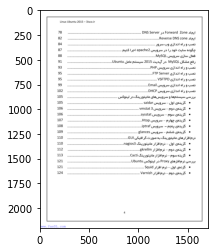

In [22]:
%matplotlib inline

plt.imshow(cv_images[3])

## 1.4. Saving images in desired format (with some randomization)

In [23]:
from uuid import uuid4 

for image in cv_images:
    cv2.imwrite(f'images/{uuid4()}.jpg', image)

## 1.5. Working on images to be suitable for YOLOv5 training

In [9]:
import random

random.seed()

In [24]:
images = os.listdir('images')

In [25]:
image = cv2.imread(f'images/{images[45]}')
image = cv2.bitwise_not(image)

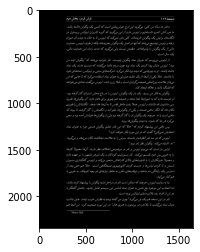

In [26]:
%matplotlib inline

plt.imshow(image)

## 1.6. Picking some random images, make them greyscale, then bitwise_not() them

In [27]:
random_images = []

for i in range(25):
    temp = cv2.imread('images/' + images[random.randrange(25)])
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    temp = cv2.bitwise_not(temp)
    random_images.append(temp)

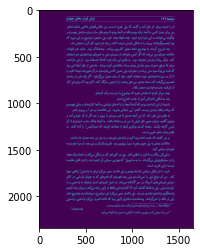

In [30]:
%matplotlib inline

plt.imshow(random_images[8])

## 1.7. Saving images to dataset directory (not available on git)

In [31]:
from uuid import uuid4 

for image in random_images:
    cv2.imwrite(f'{uuid4()}.jpg', image)

## 2. Starting Inference

## 2.1. Line Detection

In this part of the project, we just detect chunks of the file which include text. Each chunk is called a _line_ and it'll be sorted using the _y axis_ minimum value.

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

Run the following cell only if you get any SSL related error while loading the model. Otherwise, it's not needed.

In [34]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [35]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='models/lines.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /Users/prp-e/.cache/torch/hub/master.zip
requirements: tqdm>=4.64.0 not found and is required by YOLOv5, attempting auto-update...
requirements: Command 'pip install "tqdm>=4.64.0" ' returned non-zero exit status 1.
YOLOv5 🚀 2022-7-20 Python-3.8.6 torch-1.10.0 CPU

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


In [42]:
image = cv2.imread('images/0a6cc079-e4a3-411c-b9ba-16bca623124d.jpg')

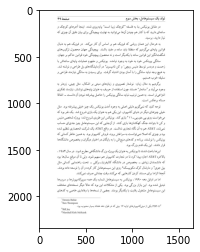

In [43]:
%matplotlib inline

plt.imshow(image)

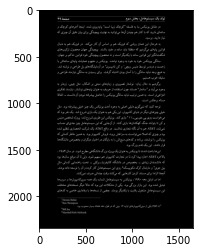

In [44]:
image = cv2.bitwise_not(image)

%matplotlib inline
plt.imshow(image)

In [45]:
result = model(image.copy())

In [40]:
result.print()

image 1/1: 2339x1654 35 lines
Speed: 8.8ms pre-process, 507.3ms inference, 1.2ms NMS per image at shape (1, 3, 672, 480)


## 2.2. Checking Confidence of the lines detected

In [41]:
result.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,914.288818,71.469093,1364.587769,119.575363,0.912967,0,line
1,931.318970,1431.545776,1362.104126,1481.879395,0.899904,0,line
2,209.402817,648.981445,1331.044067,698.412476,0.894801,0,line
3,212.221329,1376.364136,1317.073364,1421.975342,0.893889,0,line
4,1093.614014,705.706177,1365.672607,755.514893,0.893013,0,line
5,1092.212524,952.274597,1362.940918,996.903381,0.876017,0,line
6,1133.636353,281.231812,1361.668823,327.672394,0.870757,0,line
7,190.049210,1798.033203,1320.272705,1851.353638,0.865513,0,line
8,372.126984,2083.598633,1270.149170,2124.288086,0.864535,0,line
9,233.299713,219.949020,1309.906616,267.055969,0.854842,0,line


## 2.3. Saving images including lines

In [46]:
df = result.pandas().xyxy[0]
df = df.sort_values('ymin')

df.head()

,xmin,ymin,xmax,ymax,confidence,class,name
0,914.288818,71.469093,1364.587769,119.575363,0.912967,0,line
10,194.333374,72.643616,331.235474,116.062111,0.844079,0,line
20,172.610245,154.751328,1341.329468,206.853668,0.717814,0,line
9,233.299713,219.949020,1309.906616,267.055969,0.854842,0,line
6,1133.636353,281.231812,1361.668823,327.672394,0.870757,0,line


In [51]:
coords = []

for xmin, ymin, xmax, ymax, conf in zip(df['xmin'], df['ymin'], df['xmax'], df['ymax'], df['confidence']):
    if conf > .5:
        coord_temp = [xmin, ymin, xmax, ymax]
        coords.append(coord_temp)

In [52]:
coords[1]

[194.3333740234375, 72.64361572265625, 331.2354736328125, 116.0621109008789]

## 2.4. Cropping a chunk of the _image_ just for test

In [62]:
test_image = image.copy()

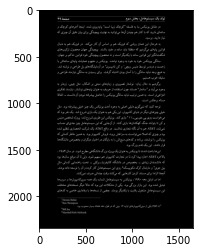

In [63]:
%matplotlib inline
plt.imshow(test_image)

In [64]:
test_image = test_image[int(coords[4][1]):int(coords[4][3]), int(coords[4][0]):int(coords[4][2])]

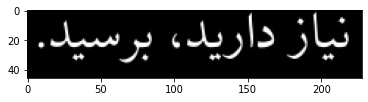

In [65]:
%matplotlib inline
plt.imshow(test_image)

## 2.5. Saving all chunks

In [66]:
target_image = image.copy()

In [68]:
for chunk in coords:
    cv2.imwrite(f'line_results/{uuid4()}.jpg', target_image[int(chunk[1]):int(chunk[3]), int(chunk[0]):int(chunk[2])])

## 2.6. Working on a chunk

In [95]:
image = cv2.imread('line_results/eb766e54-b99e-4f6c-9514-53d848622970.jpg')
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

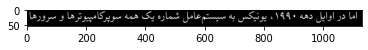

In [96]:
%matplotlib inline
plt.imshow(image)

## 3. Word Detection (No magic, just OpenCV basic tools)

Since the _line detection_ does not seem to work pretty well, I just use those _lines_ I extracted from the image to determine the word borders. It'll be done with contours and stuff which are built-in the OpenCV library.

In [158]:
threshold = cv2.threshold(grey, 25, 255, cv2.THRESH_BINARY)[1]

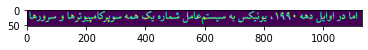

In [159]:
%matplotlib inline
plt.imshow(threshold)

In [160]:
threshold = cv2.dilate(threshold, None, iterations=5)

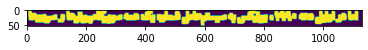

In [161]:
%matplotlib inline
plt.imshow(threshold)

In [162]:
cntrs, _ = cv2.findContours(threshold.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [163]:
cntr_coords = []

for c in cntrs:
    coord = cv2.boundingRect(c)
    cntr_coords.append(coord)

In [164]:
len(cntr_coords)

13

## 3.1. Saving desired contours in a folder for further reviews

In [138]:
for coord in cntr_coords:
    (x, y, w, h) = coord
    cv2.imwrite(f'contours/{uuid4()}.jpg', image[y:y+h, x:x+w])

## 3.2. Taking a look at contour Areas

In [165]:
for c in cntrs:
    print(f'Area: {cv2.contourArea(c)}')

Area: 266.0
Area: 1169.5
Area: 702.5
Area: 1119.0
Area: 1931.0
Area: 990.0
Area: 3067.0
Area: 3023.5
Area: 3834.5
Area: 2044.5
Area: 1439.0
Area: 5421.5
Area: 2984.5


## 3.3. Saving contours in order

In [166]:
for coord, i in zip(cntr_coords, range(len(cntr_coords))):
    (x, y, w, h) = coord
    cv2.imwrite(f'contours/{i}.jpg', image[y:y+h, x:x+w])

Although it doesn't recognize every contour in the image, the result is somehow promising.

## 3.4. Making contour list into a data frame

I'm doing this, in order to make sorting easier. Of course, there is an easier way for sorting as well.

In [169]:
cntrs_df = pd.DataFrame(cntr_coords, columns=['x', 'y', 'w', 'h'])

In [170]:
cntrs_df

,x,y,w,h
0,817,15,16,20
1,916,9,53,26
2,677,9,29,35
3,325,9,55,26
4,834,2,76,35
5,1082,0,36,35
6,971,0,108,47
7,708,0,105,46
8,521,0,154,52
9,437,0,82,42


In [171]:
cntrs_df = cntrs_df.sort_values('x')

In [177]:
cntr_coords = cntrs_df.values.tolist()
cntr_coords = list(reversed(cntr_coords))

In [178]:
for coord, i in zip(cntr_coords, range(len(cntr_coords))):
    (x, y, w, h) = coord
    cv2.imwrite(f'contours/{i}.jpg', image[y:y+h, x:x+w])

## 4. Working on inference and OCR

Since contouring somehow worked on the selected chunk of text, now we're going to work with the inference on each word. If we can make sure it works well, we can claim that this OCR project worked pretty well and we're good to go.